In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm
%matplotlib notebook

In [16]:
file = pd.read_csv("Objects.csv")
file.head()

,mass,x,y,z,v_x,v_y,v_z
0,1000,0,0,0,0,0,0
1,1,0,15,0,80,0,0


In [17]:
class CosmicBody:
    def __init__(self, m = 1, r = np.array([0, 0, 0]), v = np.array([0, 0, 0])):
        self.m = m
        self.r = r
        self.v = v
    def step(self, a, dt):

        self.r = self.r + dt * self.v + a * dt * dt / 2
        self.v = self.v + a

In [18]:
frame = np.array([])
for i in file.index:
    body = CosmicBody()
    body.r = np.array([file["x"][i], file["y"][i], file["z"][i]])
    body.v = np.array([file["v_x"][i], file["v_y"][i], file["v_z"][i]])
    body.m = file["mass"][i]
    frame = np.append(frame, body)

In [19]:
def acceleration(frame):
    accel = np.array([])
    for i in frame:
        frame1 = frame[frame != i]
        for j in frame1:
            a = np.array([])
            rvec = j.r - i.r
            a = np.append(a, j.m * rvec / ((rvec[0] ** 2 + rvec[1] ** 2 + rvec[2] ** 2) ** (3/2)))
            a.reshape(-1, 3)
            np.sum(a, axis = 0)
        accel = np.append(accel, a)
    return accel.reshape(-1, 3)

In [20]:
def show(frame, t, dt):
    fig = plt.figure(figsize=(7, 7))
    ax = fig.add_subplot(111, projection='3d')
    p = 4
    for t in tqdm(np.arange(0., 4, dt)):
            accel = acceleration(frame)
            p += 0.02
            #angle = 60# + 60 * p / t0
            ax.clear()
            ax.axes.set_xlabel("X")
            ax.axes.set_ylabel("Y")
            ax.axes.set_zlabel("Z") 
            ax.axes.set_xlim3d(-30, 30)
            ax.axes.set_ylim3d(-30, 30)
            ax.axes.set_zlim3d(-30, 30)
            for elem in frame:
                #ax.clear()
                ax.scatter(elem.r[0], elem.r[1], elem.r[2], s=20)
                elem.step(accel[frame == elem][0], dt)
            #ax.view_init(angle, 0)
            fig.canvas.draw()
            #self.destroy()

<IPython.core.display.Javascript object>


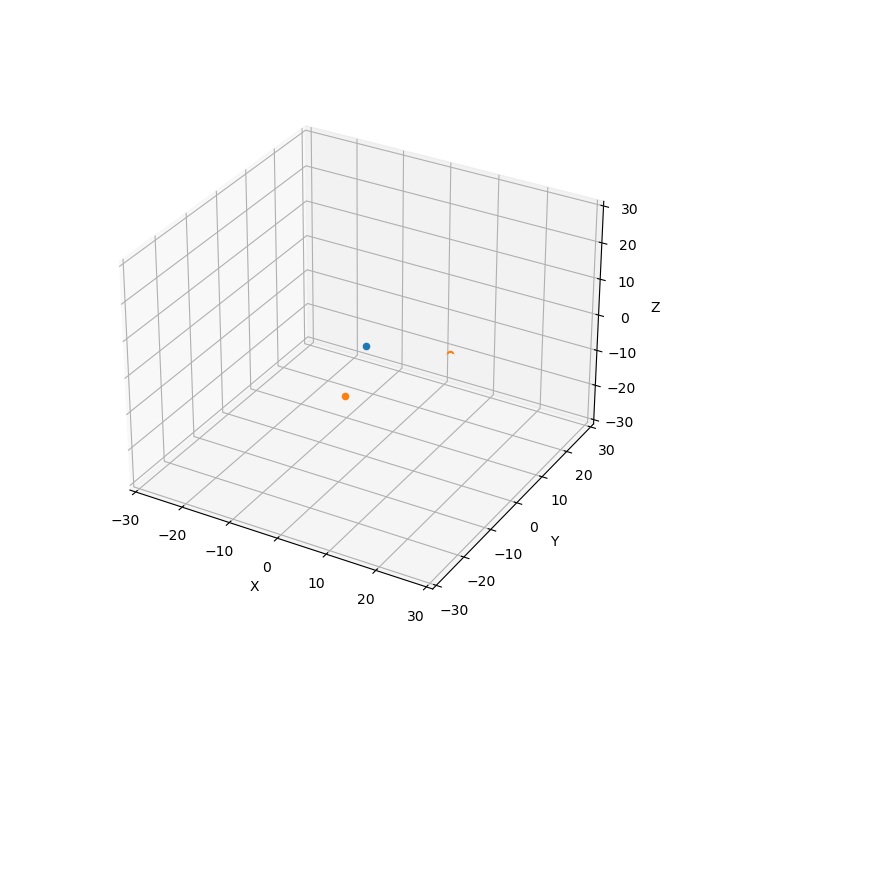

 14%|███████████▎                                                                     | 56/400 [00:08<00:49,  7.02it/s]

In [ ]:
if __name__ == '__main__':
    t = 100
    dt = 0.01
    show(frame, t, dt)
    